In [54]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [55]:
# Load the file for analysis and view columns

df = pd.read_csv('/Users/lacivert/4/usYld.csv')

dfyields = pd.DataFrame(df)

list(dfyields.columns.values)

['Date',
 '1 mo',
 '3 mo',
 '6 mo',
 '1 yr',
 '2 yr',
 '3 yr',
 '5 yr',
 '7 yr',
 '10 yr',
 '20 yr',
 '30 yr']

In [56]:
# Setting up my variables

one_month, three_month, six_month, one_year = df.loc[:,'1 mo'], df.loc[:,'3 mo'], df.loc[:,'6 mo'], df.loc[:,'1 yr']

two_year, three_year, five_year, seven_year = df.loc[:,'2 yr'], df.loc[:,'3 yr'], df.loc[:,'5 yr'], df.loc[:,'7 yr']

ten_year, twenty_year, thirty_year = df.loc[:,'10 yr'], df.loc[:,'20 yr'], df.loc[:,'30 yr']

In [57]:
dfyields.replace(['N/A', 'NA', 'NaN'], ' ')

,Date,1 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,1/2/90,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1/3/90,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1/4/90,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1/5/90,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1/8/90,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
5,1/9/90,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
6,1/10/90,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
7,1/11/90,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
8,1/12/90,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17
9,1/16/90,NaN,7.89,7.99,7.92,8.10,8.13,8.11,8.18,8.20,NaN,8.25


ValueError: cannot convert float NaN to integer

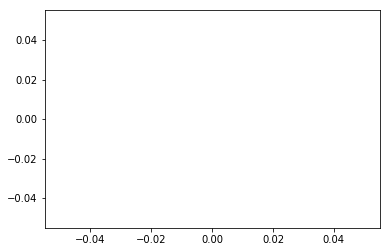

In [58]:
# Exploratory Data Analysis

# Visualizing my variables 
sns.distplot(one_month,label='1 Month')
plt.xlabel('All Maturities',color='green')
plt.ylabel('Frequency of Yield Curve Rates',color='green')
plt.title('Daily Distplot January 1990 - August 2018', color='green')
plt.legend()